In [1]:
import warnings
warnings.filterwarnings('ignore')

TARGET = 'quality'
DISCOVERY_TIMEOUT_SECONDS=2800
ESTIMATION_TIMEOUT_SECONDS=1800
REFUTATION_GLOBAL_TIMEOUT_SECONDS=1800
REFUTATION_MODEL_TIMEOUT_SECONDS=240

# Dataset and Knowledge settings

In [2]:
import pandas as pd

df = pd.read_csv('./resources/wine_quality/data.csv')
df['quality'] = df['quality'].astype(float)
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.9911,3.27,0.50,11.2,6.0,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.9949,3.15,0.46,9.6,5.0,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.9925,2.99,0.46,9.4,6.0,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.9887,3.34,0.38,12.8,7.0,white


In [3]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   float64
 12  type                  6497 non-null   object 
dtypes: float64(12), object(1)
memory usage: 660.0+ KB


None

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987100,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992300,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994900,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.039000,4.010000,2.000000,14.900000,9.000000


In [4]:
from causal_nest.knowledge import parse_knowledge_file

knowledge = parse_knowledge_file('./resources/wine_quality/knowledge.txt')
knowledge

Knowledge(required_edges=[('total_sulfur_dioxide', 'quality'), ('alcohol', 'quality')], forbidden_edges=[('quality', 'pH'), ('quality', 'volatile_acidity'), ('quality', 'density'), ('quality', 'fixed_acidity'), ('quality', 'residual_sugar'), ('quality', 'alcohol'), ('quality', 'free_sulfur_dioxide'), ('quality', 'citric_acid'), ('quality', 'total_sulfur_dioxide'), ('quality', 'chlorides'), ('quality', 'sulphates')])

In [5]:
from causal_nest.dataset import MissingDataHandlingMethod, Dataset, handle_missing_data, FeatureTypeMap, FeatureType, estimate_feature_importances

feature_mapping = [FeatureTypeMap(feature=c, type=FeatureType.CONTINUOUS) for c in df.drop(['type', 'quality'], axis=1).columns]

dataset = Dataset(data=df, target=TARGET, feature_mapping=feature_mapping)
dataset = handle_missing_data(dataset, MissingDataHandlingMethod.FORWARD_FILL)
dataset = estimate_feature_importances(dataset)
dataset

Dataset(data=      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sul

In [6]:
from causal_nest.problem import Problem

problem = Problem(dataset=dataset, description='Wine Quality', knowledge=knowledge)
problem

Problem(dataset=Dataset(data=      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

## Checking the Feature infered importance

In [7]:
problem.dataset.feature_mapping

[FeatureTypeMap(feature='alcohol', type=<FeatureType.CONTINUOUS: 3>, importance=0.2511875561572009),
 FeatureTypeMap(feature='volatile_acidity', type=<FeatureType.CONTINUOUS: 3>, importance=0.1268536676975259),
 FeatureTypeMap(feature='free_sulfur_dioxide', type=<FeatureType.CONTINUOUS: 3>, importance=0.09043546006175111),
 FeatureTypeMap(feature='sulphates', type=<FeatureType.CONTINUOUS: 3>, importance=0.07817699665200303),
 FeatureTypeMap(feature='total_sulfur_dioxide', type=<FeatureType.CONTINUOUS: 3>, importance=0.07547709532438601),
 FeatureTypeMap(feature='residual_sugar', type=<FeatureType.CONTINUOUS: 3>, importance=0.0715365079223038),
 FeatureTypeMap(feature='pH', type=<FeatureType.CONTINUOUS: 3>, importance=0.06804803057030215),
 FeatureTypeMap(feature='chlorides', type=<FeatureType.CONTINUOUS: 3>, importance=0.06705799568039758),
 FeatureTypeMap(feature='citric_acid', type=<FeatureType.CONTINUOUS: 3>, importance=0.06129694967676404),
 FeatureTypeMap(feature='fixed_acidity', 

# Causal Discovery

In [8]:
from causal_nest.discovery import applyable_models

models = applyable_models(problem)
models

[causal_nest.discovery_models.pc.PC,
 causal_nest.discovery_models.gs.GS,
 causal_nest.discovery_models.ccdr.CCDR,
 causal_nest.discovery_models.iamb.IAMB,
 causal_nest.discovery_models.sam.SAM,
 causal_nest.discovery_models.bes.BES,
 causal_nest.discovery_models.grasp.GRASP,
 causal_nest.discovery_models.cgnn.CGNN]

In [9]:
from causal_nest.discovery import discover_with_all_models

problem = discover_with_all_models(problem, max_seconds_model=DISCOVERY_TIMEOUT_SECONDS)
problem.discovery_results

  0%|          | 0/1000 [00:00<?, ?it/s]

GRaSP edge count: 48    
GRaSP completed in: 15.98s 


 16%|█▌        | 162/1000 [46:37<4:28:15, 19.21s/it, disc=-.00747, gen=-.662, regul_loss=0.166, tot=-11.8]

{'PC': None,
 'GS': None,
 'CCDR': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffada4eeb0>, model='CCDR', auc_pr=None, shd=None, sid=None, runtime=16.03316607599845, priority_score=0.4311893639956881, knowledge_integrity_score=0.5, forbidden_edges_violation_rate=0.0, required_edges_compliance_rate=0.5),
 'IAMB': None,
 'SAM': None,
 'BES': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffad9e0190>, model='BES', auc_pr=None, shd=None, sid=None, runtime=400.34990126799676, priority_score=1.1040805785123966, knowledge_integrity_score=0.7272727272727273, forbidden_edges_violation_rate=0.2727272727272727, required_edges_compliance_rate=1.0),
 'GRASP': None,
 'CGNN': None}

In [10]:
list(sorted(filter(lambda x: x, problem.discovery_results.values()), key=lambda x: x.priority_score, reverse=True))

[DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffad9e0190>, model='BES', auc_pr=None, shd=None, sid=None, runtime=400.34990126799676, priority_score=1.1040805785123966, knowledge_integrity_score=0.7272727272727273, forbidden_edges_violation_rate=0.2727272727272727, required_edges_compliance_rate=1.0),
 DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffada4eeb0>, model='CCDR', auc_pr=None, shd=None, sid=None, runtime=16.03316607599845, priority_score=0.4311893639956881, knowledge_integrity_score=0.5, forbidden_edges_violation_rate=0.0, required_edges_compliance_rate=0.5)]

# Causal Estimation

In [11]:
from causal_nest.estimation import estimate_all_effects

problem = estimate_all_effects(problem, verbose=True, max_seconds_model=ESTIMATION_TIMEOUT_SECONDS)
problem.estimation_results

{'BES': [EstimationResult(model='BES', treatment='alcohol', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff137ab8e0>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7fff137b51c0>, control_value=0, treatment_value=1, p_value=array([4.65578842e-180])),
  EstimationResult(model='BES', treatment='volatile_acidity', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff1374ac10>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7fff13750430>, control_value=0, treatment_value=1, p_value=array([2.46774546e-33])),
  EstimationResult(model='BES', treatment='free_sulfur_dioxide', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff13767a30>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7fff13767c10>, control_value=0, treatment_value=1, p_value=None),
  EstimationResult(model='BES', treatment='sulphates', estimand=<dowhy.causal_identifier.identif

# Refutation

In [12]:
from causal_nest.refutation import refute_all_results

problem = refute_all_results(problem, max_seconds_global=REFUTATION_GLOBAL_TIMEOUT_SECONDS, max_seconds_model=REFUTATION_MODEL_TIMEOUT_SECONDS)
problem.refutation_results

e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable


{'BES': [RefutationResult(treatment='citric_acid', estimated_effect=1.0085291381486279, p_value=0.8799999999999999, new_effect=0.006098204829685496, model='PlaceboPermute', runtime=60.01167559399619, passed=True),
  RefutationResult(treatment='citric_acid', estimated_effect=1.0085291381486279, p_value=0.76, new_effect=1.0083726090520744, model='RandomCommonCause', runtime=54.115317509000306, passed=True),
  RefutationResult(treatment='citric_acid', estimated_effect=1.0085291381486279, p_value=0.92, new_effect=1.008762505862284, model='SubsetRemoval', runtime=47.36839701799909, passed=True),
  RefutationResult(treatment='alcohol', estimated_effect=0.35436764870311643, p_value=0.96, new_effect=0.0009150519245161082, model='PlaceboPermute', runtime=64.00718271599908, passed=True),
  RefutationResult(treatment='alcohol', estimated_effect=0.35436764870311643, p_value=0.94, new_effect=0.35436379504164145, model='RandomCommonCause', runtime=63.286448760991334, passed=True),
  RefutationResult

# Output Graphs

In [13]:
from causal_nest.result import generate_all_results


graphs = generate_all_results(problem)
graphs

{'PC': None,
 'GS': None,
 'CCDR': 'digraph G {\nfontname="Helvetica,Arial,sans-serif";\nnode[style="filled", fontsize=20, penwidth=2.5, fixedsize=true, fontcolor="black", fillcolor="gray", color="black", shape="circle"];\nedge[penwidth=2, minlen=2];\nsplines="polyline";\n   "alcohol"[width=1, height=1, label="alcohol\n0.34", fillcolor="#4CAF50", fontcolor="white"];\n   "volatile_acidity"[width=1, height=1, label="volatile_acidity\n-1.32", fillcolor="lightpink"];\n   "free_sulfur_dioxide"[width=1, height=1, label="free_sulfur_dioxide\n0.00", fillcolor="#4CAF50", fontcolor="white"];\n   "sulphates"[width=1, height=1, label="sulphates\n0.32", fillcolor="#4CAF50", fontcolor="white"];\n   "total_sulfur_dioxide"[width=1, height=1, label="total_sulfur_dioxide\n-0.00", fillcolor="lightpink"];\n   "residual_sugar"[width=1, height=1, label="residual_sugar\n0.00", fillcolor="gray;0.25:lightgray;0.25:gray;0.25:lightgray;0.25", color="lightgray", style="wedged", shape="doublecircle"];\n   "pH"[wid

PC
No graph
GS
No graph
CCDR


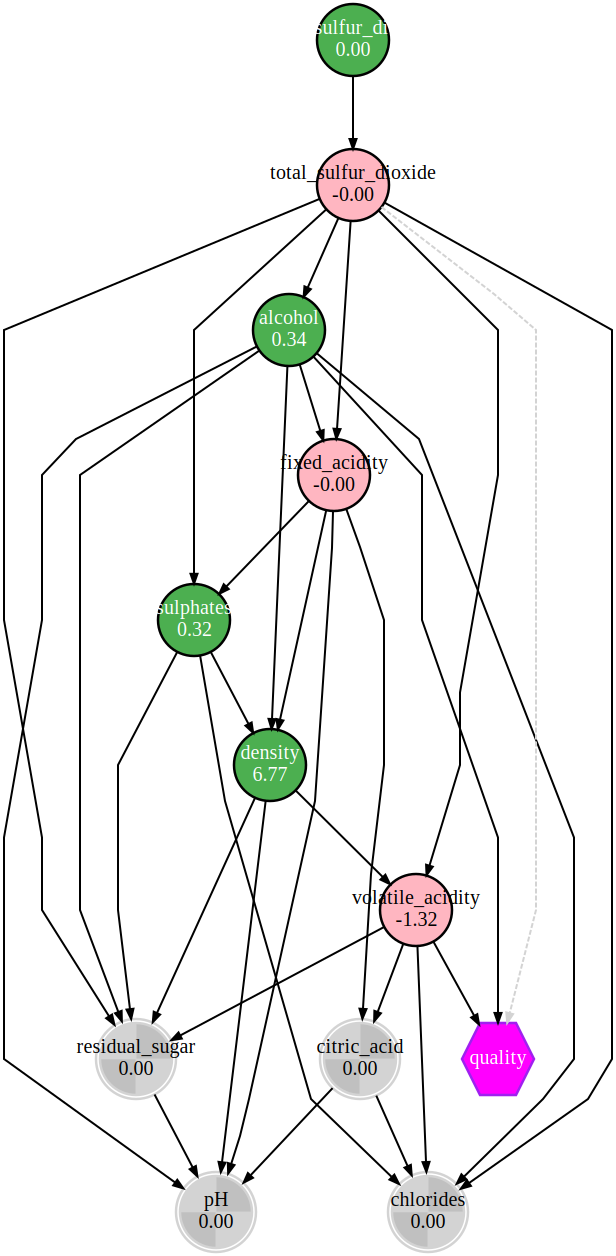

IAMB
No graph
SAM
No graph
BES


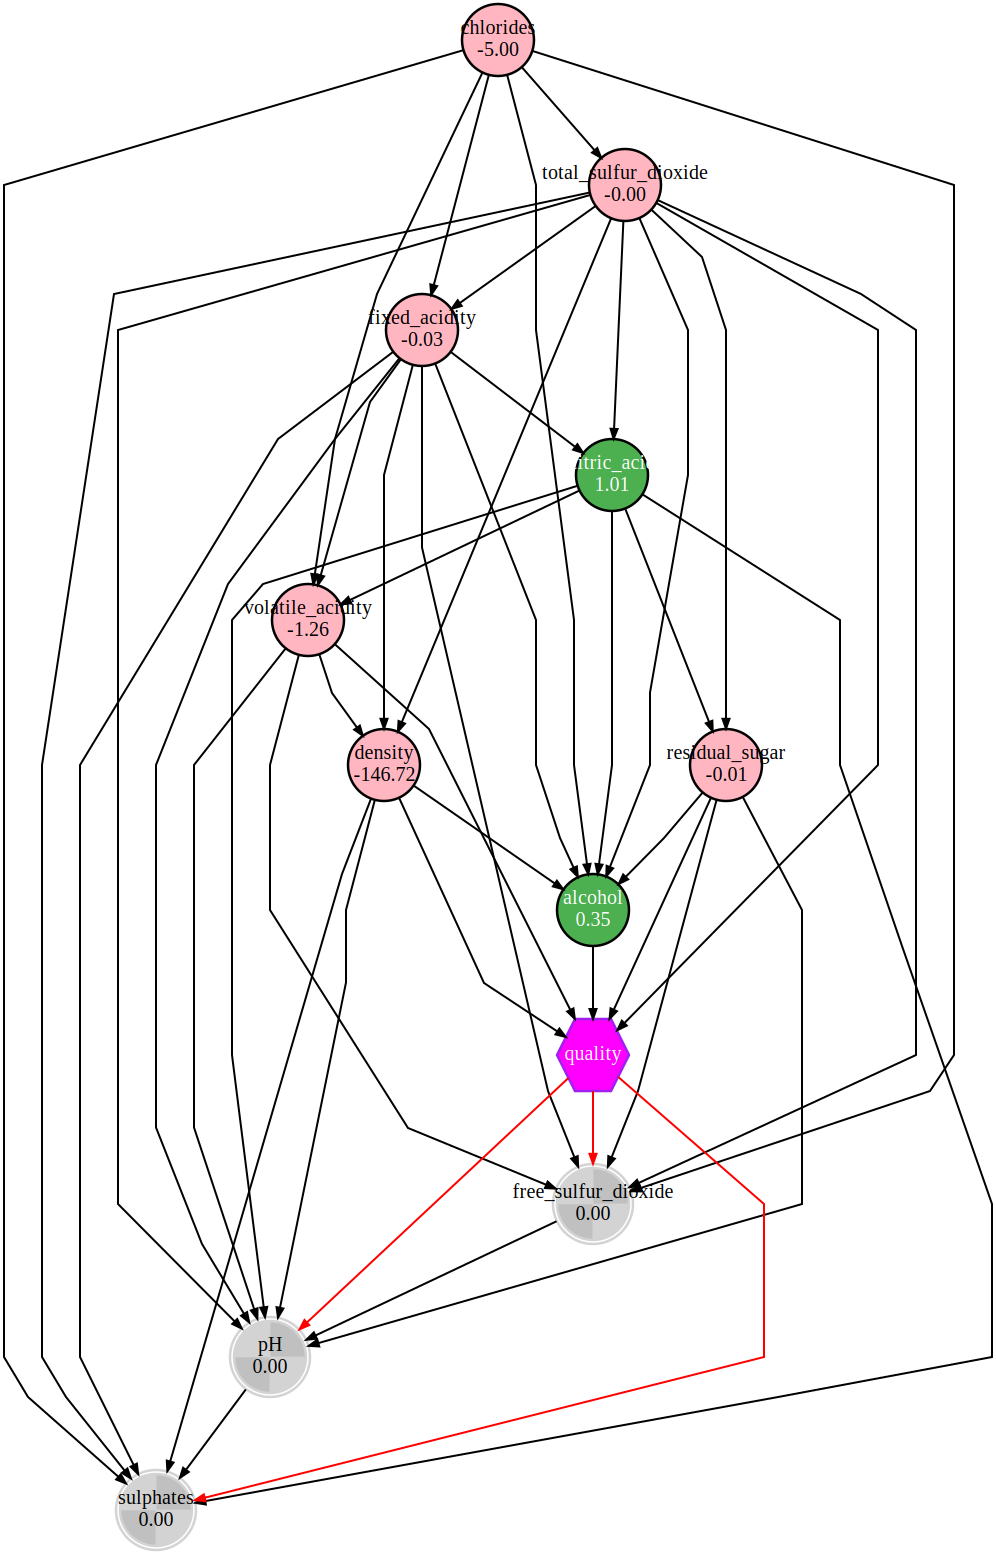

GRASP
No graph
CGNN
No graph


In [14]:
from graphviz import Source

for k, v in graphs.items():
    print(k)

    if v is None: 
        print('No graph')
    else:
        display(Source(v))